# Workshop #4: Descriptive Statistics & Intro to Probability

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import seaborn as sns
import scipy.stats as stats
import random

## Problem 1
Michael is throwing darts at a target. He is very good at the game, so the chances of him hitting the “bullseye” (i.e. the center) are 25%. It is reasonable to assume that individual **attempts are independent**. If he throws 5 times in total, what is the probability that he will hit the bullseye:
* Exactly three times
* at least 3 times

Note: the exact numbers are:
* `P(exactly three bullseyes) = 0.08789`
* `P(at least three bullseyes) = 0.1035`

In [9]:
# We run a simulation

n = 50000 # number of simulations
throws = 5 # number of throws per simulation

exactly_three_bull = 0
at_least_three_bull = 0

for i in range(n):
    
    hitting_in_the_center = 0
    
    for j in range (throws):
        hitting_success = np.random.random()
        if hitting_success <= 0.25:
            hitting_in_the_center += 1
    if hitting_in_the_center == 3:
        exactly_three_bull +=1
        
    if hitting_in_the_center >=3:
        at_least_three_bull += 1

exactly_three_bull = exactly_three_bull/n
at_least_three_bull = at_least_three_bull/n


# Printing the conclusions
print('P(exactly three bullseye) = ', exactly_three_bull)
print('P(at least three bullseye) = ', at_least_three_bull)

P(exactly three bullseye) =  0.08804
P(at least three bullseye) =  0.10366


## Problem 2
Only two international airlines fly daily into an airport. UN Air has 70 flights a day and IS Air has 65 flights a day. Passengers flying with UN Air have an 18% probability of losing their luggage and passengers flying with IS Air have a 23% probability of losing their luggage. You overhear someone in the airport complain about her luggage being lost. Find the probability that she travelled with IS Air.

Note: the exact probability is `0.543`

In [29]:
# We run a simulation
n = 5000 # number of simulations

all_lost = 0
IS_lost_luggage = 0
UN_lost_luggage = 0

for i in range(n):

    IS = np.random.random()
    lost_luggage = np.random.random()

    if IS <= 65/135:
        if lost_luggage <= 0.23:
            all_lost +=1
            IS_lost_luggage +=1
         
    else:
        if lost_luggage <0.18:
            all_lost +=1
            UN_lost_luggage +=1
            
print('P(IS lost luggage to all lost luggage) = ', (IS_lost_luggage/n)/(all_lost/n))           

P(IS lost luggage to all lost luggage) =  0.5413461538461539


## Problem 3

The five most common words appearing in spam emails are shipping!, today!, here!, available, and fingertips! (Andy Greenberg, “The Most Common Words In Spam Email,” Forbes website, March 17, 2010). Many spam filters separate spam from ham (email not considered to be spam) through application of Bayes’ theorem. Suppose that for one email account, 1 in every 10 messages is spam and the proportions of spam messages that have the five most common words in spam email are given below.

| Word        	| Probability 	|
|-------------	|-------------	|
| shipping!   	| 0.051       	|
| today!      	| 0.045       	|
| here!       	| 0.034       	|
| available   	| 0.014       	|
| fingertips! 	| 0.014       	|


Also suppose that the proportions of ham messages that have these words are:

| Word        	| Probability 	|
|-------------	|-------------	|
| shipping!   	| 0.0015      	|
| today!      	| 0.0022      	|
| here!       	| 0.0022      	|
| available   	| 0.0041      	|
| fingertips! 	| 0.0011      	|

a) If a message includes the word shipping!, what is the probability the message is spam? If a message includes the word shipping!, what is the probability the message is ham? Should messages that include the word shipping! be flagged as spam?

b) If a message includes the word today!, what is the probability the message is spam? If a message includes the word here!, what is the probability the message is spam? Which of these two words is a stronger indicator that a message is spam? Why?

c) If a message includes the word available, what is the probability the message is spam? If a message includes the word fingertips!, what is the probability the message is spam? Which of these two words is a stronger indicator that a message is spam? Why?

d) What insights do the results of parts b) and c) yield about what enables a spam filter that uses Bayes’ theorem to work effectively?

In [61]:

spam_words = {'Spam words': ['shipping!', 'today!', 'here!', 'available', 'fingertips!'], 'Probability': [0.051, 0.045, 0.034, 0.014, 0.014]}
df_spam_words = pd.DataFrame(spam_words)
df_spam_words


,Spam words,Probability
0,shipping!,0.051
1,today!,0.045
2,here!,0.034
3,available,0.014
4,fingertips!,0.014


In [62]:
ham_words = {'Ham words': ['shipping!', 'today!', 'here!', 'available', 'fingertips!'], 'Probability': [0.0015, 0.0022, 0.0022, 0.0041, 0.0011]}
df_ham_words = pd.DataFrame(ham_words)
df_ham_words

,Ham words,Probability
0,shipping!,0.0015
1,today!,0.0022
2,here!,0.0022
3,available,0.0041
4,fingertips!,0.0011


In [98]:
# a) If a message includes the word shipping!, what is the probability the message is spam? If a message includes the word shipping!,
#what is the probability the message is ham? Should messages that include the word shipping! be flagged as spam?
# Run simulations
n = 100000 # number of simulations

shipping = 0
spam_shipping = 0
ham_shipping = 0

for i in range(n):

    spam = np.random.random()
    word_shipping = np.random.random()

    if spam <= 0.1:
        if word_shipping <= 0.051:
            shipping +=1
            spam_shipping +=1
         
    else:
        if word_shipping <= 0.0015:
            shipping +=1
            ham_shipping +=1
    
            
print(spam_shipping/shipping)
print(ham_shipping/shipping)


0.7861271676300579
0.2138728323699422


In [134]:
#b) If a message includes the word today!, what is the probability the message is spam? If a message includes the word here!, 
#what is the probability the message is spam? Which of these two words is a stronger indicator that a message is spam? Why?
n = 100000 # number of simulations

today = 0
spam_today = 0
ham_today = 0

for i in range(n):

    spam = np.random.random()
    word_today = np.random.random()

    if spam <= 0.1:
        if word_today <= 0.045:
            today +=1
            spam_today +=1
         
    else:
        if word_today <= 0.0022:
            today +=1
            ham_today +=1
    

    
here = 0
spam_here = 0
ham_here = 0

for i in range(n):

    spam = np.random.random()
    word_here = np.random.random()

    if spam <= 0.1:
        if word_here <= 0.034:
            here +=1
            spam_here +=1
         
    else:
        if word_here <= 0.0022:
            here +=1
            ham_here +=1    
    

print(f'The word today is a stronger indicator that the message is a spam with P {spam_today/today}, compared to the word here with probability of {spam_here/here}')

The word today is a stronger indicator that the message is a spam with P 0.698340874811463, compared to the word here with probability of 0.6247334754797441


In [131]:
#c) If a message includes the word available, what is the probability the message is spam? If a message includes the word fingertips!, what is the probability the message is spam? 
#Which of these two words is a stronger indicator that a message is spam? Why?

n = 100000 # number of simulations

available = 0
spam_available = 0
ham_available = 0

for i in range(n):

    spam = np.random.random()
    word_available = np.random.random()

    if spam <= 0.1:
        if word_available <= 0.014:
            available +=1
            spam_available +=1
         
    else:
        if word_available <= 0.0041:
            available +=1
            ham_available +=1
    
    
fingertips = 0
spam_fingertips = 0
ham_fingertips = 0

for i in range(n):

    spam = np.random.random()
    word_fingertips = np.random.random()

    if spam <= 0.1:
        if word_fingertips <= 0.014:
            fingertips +=1
            spam_fingertips +=1
         
    else:
        if word_fingertips <= 0.0011:
            fingertips +=1
            ham_fingertips +=1    
    

print(f'The word fingertips is a stronger indicator that the message is a spam with P {spam_fingertips/fingertips}, compared to word available with probability of {spam_available/available}')


The word fingertips is a stronger indicator that the message is a spam with P 0.5905797101449275, compared to word available with probability of 0.2607758620689655


In [138]:
#d) What insights do the results of parts b) and c) yield about what enables a spam filter that uses Bayes’ theorem to work effectively?

print('Using Bayes theorem, it can be realized that based on our simulation on 100.000 samples, the less likely probability that a message will be categorized as a spam message is if this message contains the word available, while the most likely the message to be categorized as spam message is if it contains the word today.' )

Using Bayes theorem, it can be realized that based on our simulation on 100.000 samples, the less likely probability that a message will be categorized as a spam message is if this message contains the word available, while the most likely the message to be categorized as spam message is if it contains the word today.


## Problem 4
The file `major_salary.csv` contains data about monthly salaries and majors for some emplyees.
* Consider all the salary data. Construct a histogram and a box plot to visualize the distribution of the salaries. Then calculate the Five-Number-Summary of the salaries for all employees and the skewness coefficient.
* Using the **1.5×IQR rule**, identify and list any outliers in the set of all salaries.
* Now consider the data about the salaries *categorized by major*. Visualize the salaries for each major by box-plots in one graph (**use seaborn exactly as the one we did on Monday for the fuel data**). Comment the results.

In [140]:
# Loading the data
df = pd.read_csv('major_salary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   major   111 non-null    object
 1   salary  111 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [141]:
df

,major,salary
0,Management,3330
1,Management,2700
2,Finance,3155
3,Accounting,3855
4,Info Systems,4220
...,...,...
106,Management,3080
107,Management,3615
108,Finance,3800
109,Info Systems,2830


In [15]:
np.sqrt(111)

10.535653752852738

This is the five nmber summary for the salaries:
min =  2240
Q1 =  3165.0
Median =  3645.0
Q3 =  4025.0
max =  2240


{'whiskers': [<matplotlib.lines.Line2D at 0x1a612c9e7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a612cbb820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a612c9efd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a612cbb430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a612cb6460>],
 'means': []}

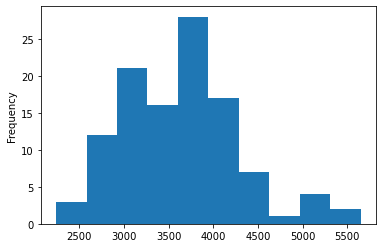

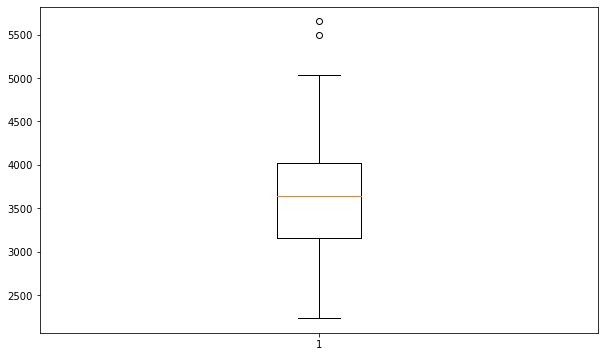

In [142]:
# Constructing histogram and box-plot of the salaries
df['salary'].plot.hist()
# Calculating the five-number summary
salary = df['salary']

min_salary = salary.min()
Q1_salary = np.percentile(salary,25)
median_salary = salary.median()
Q3_salary = np.percentile(salary,75)
max_salary = salary.min()

print('This is the five nmber summary for the salaries:')

print('min = ', min_salary)
print('Q1 = ', Q1_salary)
print('Median = ', median_salary)
print('Q3 = ', Q3_salary)
print('max = ', max_salary)

plt.figure(figsize=(10,6))
plt.boxplot(salary)

In [25]:
df['salary'].describe() # alternative way

count     111.000000
mean     3640.225225
std       651.802880
min      2240.000000
25%      3165.000000
50%      3645.000000
75%      4025.000000
max      5650.000000
Name: salary, dtype: float64

In [146]:
# Listing outliers with the 1.5*IQR Rule
IQR = Q3_salary - Q1_salary

L = Q1_salary - 1.5*IQR
U = Q3_salary + 1.5*IQR

salary = pd.DataFrame(salary)

salary ['Outlier'] = ((salary['salary'] < L) | (salary['salary'] > U))

salary_clean = salary.loc[salary['Outlier'] == True]
salary_with_outliers = salary['salary']

In [147]:
salary_clean

,salary,Outlier
83,5650,True
94,5500,True


In [29]:
salary_with_outliers

0      3330
1      2700
2      3155
3      3855
4      4220
       ... 
106    3080
107    3615
108    3800
109    2830
110    2530
Name: salary, Length: 111, dtype: int64

<AxesSubplot:xlabel='major', ylabel='salary'>

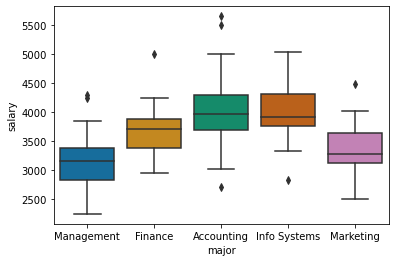

In [143]:
# Visualizing the salaries per major
sns.boxplot(y='salary', x='major',
            data=df,
            palette='colorblind')


## Problem 5

Let $M_h$ and $F_h$ be the events "the student's mother works in healthcare" and "student's father works in healthcare", respectively. Find the conditional probabilities:
* $P(M_h \mid F_h)$
* $P(F_h \mid M_h)$

Use `student-mat.csv`

In [3]:
# Loading the data set
df = pd.read_csv('student-mat.csv')
df.head()

# rows (the total)
total = df.shape[0]
# Using the formula: P(M_h | F_h) = P(M_h and F_h)/P(F_h)
MhaFh = 0 

for i in range(total):
    if df['Mjob'][i] == 'health' and df['Fjob'][i] == 'health':
        MhaFh += 1

Fh = 0        

for i in range(total):
    if df['Fjob'][i] == 'health':
        Fh += 1

PMhaFh = MhaFh / Fh

print('P(Mh | Fh) = ', PMhaFh)

# Using the formula: P(F_h | M_h) = P(F_h and M_h)/P(M_h)
FhaMh = 0 

for i in range(total):
    if df['Fjob'][i] == 'health' and df['Mjob'][i] == 'health':
        FhaMh += 1

Mh = 0        

for i in range(total):
    if df['Mjob'][i] == 'health':
        Mh += 1

PFhaMh = FhaMh / Mh

print('P(Fh | Mh) = ', PFhaMh)


P(Mh | Fh) =  0.3333333333333333
P(Fh | Mh) =  0.17647058823529413


## Problem 6

The chemicals in clay used to make pottery can differ depending on the geographical region where the clay 
originated. Sometimes, archaeologists use a chemical analysis of clay to help identify where a piece of pottery 
originated. Such an analysis measures the amount of a chemical in the clay as a percent of the total weight 
of the piece of pottery. The boxplots below summarize analyses done for three chemicals—X, Y, and Z—on 
pieces of pottery that originated at one of three sites: I, II, or III.

a) For chemical Z, describe how the percents found in the pieces of pottery are similar and how they differ 
among the three sites. 

b) Consider a piece of pottery known to have originated at one of the three sites, but the actual site is not 
known. 

    i) Suppose an analysis of the clay reveals that the sum of the percents of the three chemicals X, Y, 
    and Z is 20.5%. Based on the boxplots, which site—I, II, or III—is the most likely site where the piece 
    of pottery originated? Justify your choice.
    
    ii) Suppose only one chemical could be analyzed in the piece of pottery. Which chemical—X, Y, or 
    Z— would be the most useful in identifying the site where the piece of pottery originated? Justify 
    your choice.



a) Answer: For all sites, the median of the percents of checmical Z found in the pieces of pottery is very close (about 7%). The spread of the checmical Z is greatest at the site 3 with and IQR of about 5%, the first site has the second in line greatest spread witn an IQR of around 5% (but a slightly smaller range of 6%, compared to site 3 where it is about 8%).  

b) i) Answer: Supposing that the total percents of all three chemicals X, Y and Z is 20.5%, seems that site 3 is the most likely where the pice of pottery originated, since the sum of medians are a little over 20%. Site 1 has a sum of it's median's is much higher at about 27%, while site 2 at about 16%.

b) ii) Answer: Chemical Y wold be the best chemical to test since the median at all three sites is widely different, whereas chemical Z comes out about the same at all 3 sites and chemical X is pretty close the same average at site 2 and 3. Also, chemical Y does not have any overlap in it's range, so it would be pretty unlikely to predict the wrong site based on it's outcome.

## Problem 7
In a certain town three newspapers are published. 20% of the population read A, 16% read B, 14% read C, 
8% read A and B, 5% read A and C, 4% read B and C, and 2% read all three newspapers. A person is selected 
at random. Use a Venn diagram to help determine the probability that the person reads:

a) none of the papers

b) at least one of the papers

c) exactly one of the papers

d) A or B (or both)

e) A, given that the person reads at least one paper

f) C, given that the person reads either A or B (or both

In [39]:
A = 0.20
B = 0.16
C = 0.14
A_and_B = 0.08
A_and_C = 0.05
B_and_C = 0.04
all = 0.02
A_only = A - (A_and_B + A_and_C - all)
B_only = B - (A_and_B + B_and_C - all)
C_only = C - (A_and_C + B_and_C - all)


In [34]:
# b) at least one of the papers
At_least_one = round(A + B + C - A_and_B - B_and_C - A_and_C + all,4)
print(At_least_one)

0.35


In [35]:
# a) Persons reads none of the papers
none_papers = round(1 - At_least_one,4)
print(none_papers)


0.65


In [40]:
# c) exactly one of the papers
exactly_one = A_only + B_only + C_only
exactly_one

0.22000000000000003

In [36]:
# e) A, given that the person reads at least one paper
A_cond_B = round(A/At_least_one,4)
print(A_cond_B)

0.5714


In [37]:
# d) A or B (or both)
A_or_B = round(A + B - A_and_B,4) 
print(A_or_B)

0.28


In [45]:
# f) C, given that the person reads either A or B (or both)
C_cond_A_or_B = (A_and_C+ B_and_C - all)/(A+B-A_and_B)
print(C_cond_A_or_B)

0.25


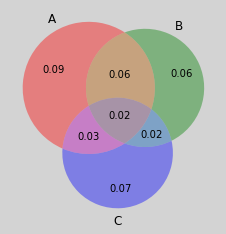

In [47]:
# Visualization time!
plt.figure(facecolor='lightgray')
venn3(subsets = np.round((A_only, B_only, A_and_B-all, C_only, A_and_C-all, B_and_C-all, all), 7),
      set_labels=['A', 'B', 'C'])
plt.show()